In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 432x288 with 0 Axes>

In [2]:
data_raw = pd.read_csv("Data/dataset_mood_smartphone.csv")

In [3]:
print(data_raw.columns)

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')


In [4]:
variables = data_raw['variable'].unique()
print(variables)

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [5]:
data_raw['time'] = pd.to_datetime(data_raw['time'])

In [6]:
data_raw = data_raw.drop(columns=['Unnamed: 0'])

In [7]:
df_wide = data_raw.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()

In [8]:
def create_affect_feature(row):
    if row['circumplex.valence'] == 'NaN' or row['circumplex.arousal'] == 'NaN':
        return
    else:
        return (row['circumplex.arousal']*5)+row['circumplex.valence']
        

In [9]:
df_wide['affect'] = df_wide.apply(lambda row: create_affect_feature(row), axis=1)

In [10]:
display(df_wide)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,affect
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#remove first part for AS14.01 as it contains only few days of mood reports
to_remove = (df_wide['id'] == 'AS14.01') & (df_wide['time'] < pd.Timestamp(2014, 3, 21))
df_wide = df_wide.loc[~to_remove]

### Exploration

In [35]:
reported_days = []
for idx in df_wide['id'].unique():
    df_id = df_wide.loc[df_wide['id']==idx]
    df_id = df_id.loc[df_id['mood'].notnull()]
#     df_id.plot(x='time', y=('mood', 'mean'), title=idx, xlim=(df_wide['time'].min(), df_wide['time'].max()))
    num_days = (df_id['time'].max() - df_id['time'].min()).days
    reported_days.append(num_days)




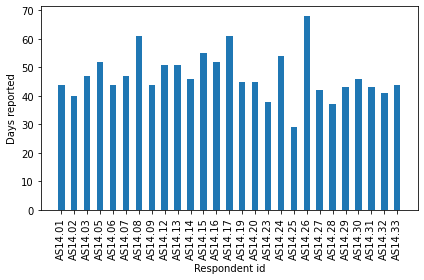

In [44]:
# num reported days per id
plt.bar(x=df_wide['id'].unique(), height=reported_days, width=0.5)
# plt.scatter(*zip(*reported_days))
plt.xticks(rotation='vertical')
plt.xlabel('Respondent id')
plt.ylabel('Days reported')
plt.tight_layout()
plt.savefig('ReportedDays.pdf')
plt.show()


In [13]:
df_daily = df_wide.groupby([pd.Grouper(key='time', freq='D'), 'id']).agg({'mood': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'circumplex.arousal': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'circumplex.valence': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'affect': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'activity': ['min', 'max', 'median', 'mean', 'std', 'count'],
                                                                           'screen': ['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'call':'count',
                                                                           'sms':'count',
                                                                           'appCat.builtin':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.communication':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.entertainment':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.finance':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.game':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.office':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.other':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.social':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.travel':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.unknown':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.utilities':['min', 'max', 'median', 'mean', 'std', 'count', 'sum'],
                                                                           'appCat.weather':['min', 'max', 'median', 'mean', 'std', 'count', 'sum']
                                                                           }).reset_index()

In [14]:
display(df_daily)

time       id mood                                   \
                          min  max median mean       std count   
0    2014-02-17  AS14.02  NaN  NaN    NaN  NaN       NaN     0   
1    2014-02-17  AS14.03  NaN  NaN    NaN  NaN       NaN     0   
2    2014-02-17  AS14.06  NaN  NaN    NaN  NaN       NaN     0   
3    2014-02-17  AS14.08  NaN  NaN    NaN  NaN       NaN     0   
4    2014-02-17  AS14.09  NaN  NaN    NaN  NaN       NaN     0   
...         ...      ...  ...  ...    ...  ...       ...   ...   
1942 2014-06-05  AS14.24  7.0  7.0    7.0  7.0  0.000000     5   
1943 2014-06-06  AS14.24  7.0  8.0    7.5  7.5  0.577350     4   
1944 2014-06-07  AS14.24  8.0  8.0    8.0  8.0       NaN     1   
1945 2014-06-08  AS14.24  6.0  7.0    6.5  6.5  0.707107     2   
1946 2014-06-09  AS14.24  NaN  NaN    NaN  NaN       NaN     0   

     circumplex.arousal       ... appCat.utilities               \
                    min  max  ...              std count    sum   
0                   NaN  NaN  ...              NaN     0  0.000   
1                   NaN  NaN  ...              NaN     0  0.000   
2                   NaN  NaN  ...              NaN     0  0.000   
3                   NaN  NaN  ...              NaN     0  0.000   
4                   NaN  NaN  ...              NaN     0  0.000   
...                 ...  ...  ...              ...   ...    ...   
1942               -1.0  1.0  ...              NaN     0  0.000   
1943               -2.0  2.0  ...              NaN     1  2.072   
1944               -1.0 -1.0  ...              NaN     0  0.000   
1945               -2.0 -1.0  ...              NaN     0  0.000   
1946                NaN  NaN  ...              NaN     0  0.000   

     appCat.weather                                 
                min max median mean std count  sum  
0               NaN NaN    NaN  NaN NaN     0  0.0  
1               NaN NaN    NaN  NaN NaN     0  0.0  
2               NaN NaN    NaN  NaN NaN     0  0.0  
3               NaN NaN    NaN  NaN NaN     0  0.0  
4               NaN NaN    NaN  NaN NaN     0  0.0  
...             ...  ..    ...  ...  ..   ...  ...  
1942            NaN NaN    NaN  NaN NaN     0  0.0  
1943            NaN NaN    NaN  NaN NaN     0  0.0  
1944            NaN NaN    NaN  NaN NaN     0  0.0  
1945            NaN NaN    NaN  NaN NaN     0  0.0  
1946            NaN NaN    NaN  NaN NaN     0  0.0  

[1947 rows x 125 columns]

C:\Users\Jaimie\Anaconda3\envs\DMT\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


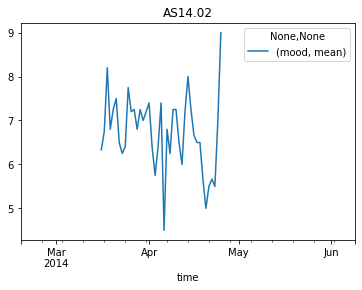

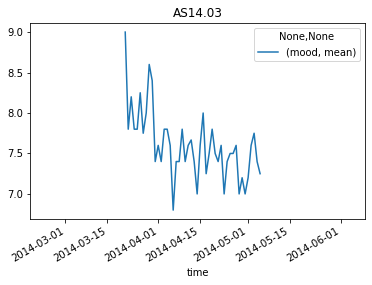

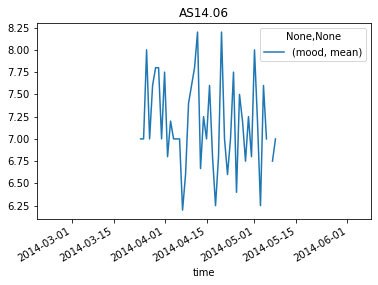

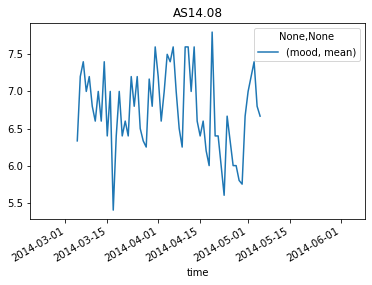

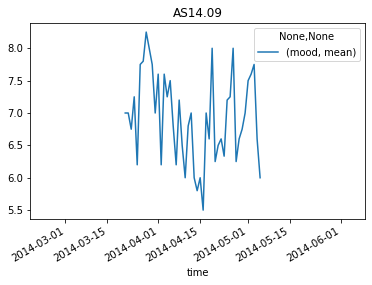

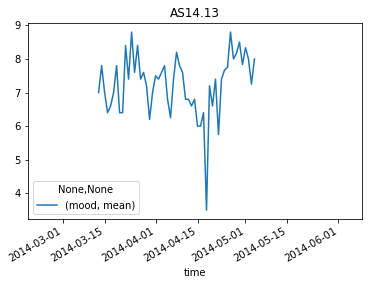

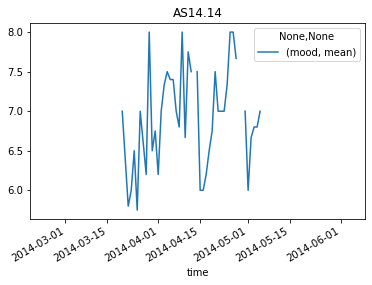

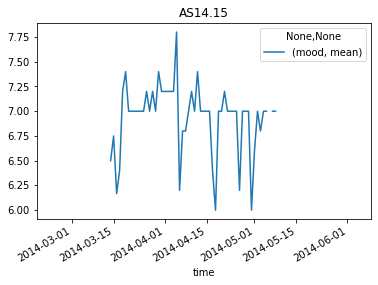

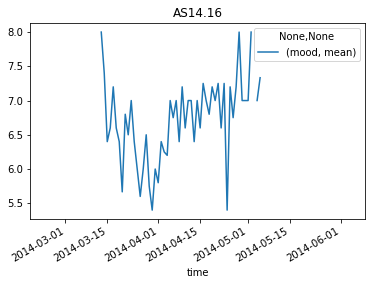

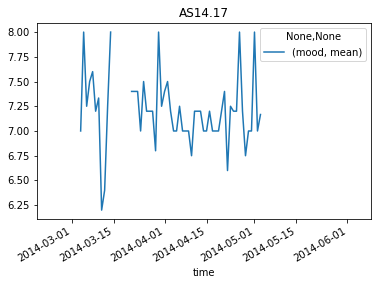

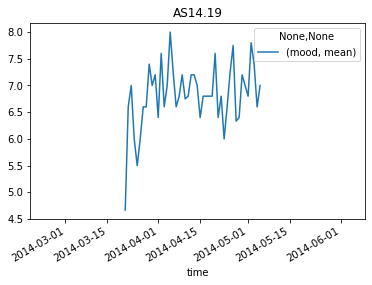

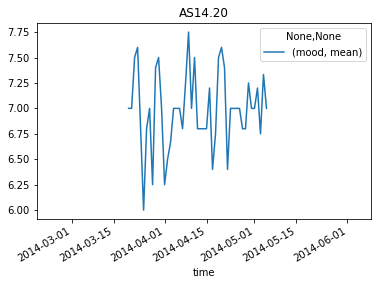

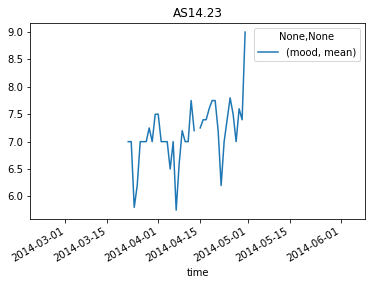

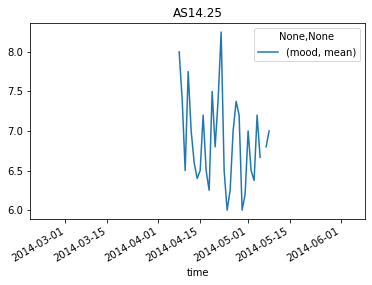

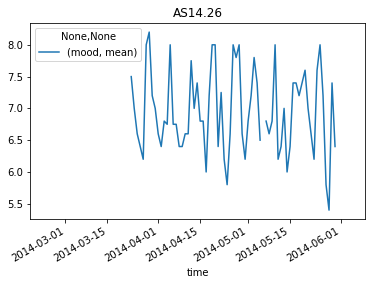

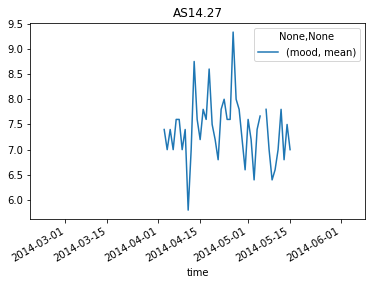

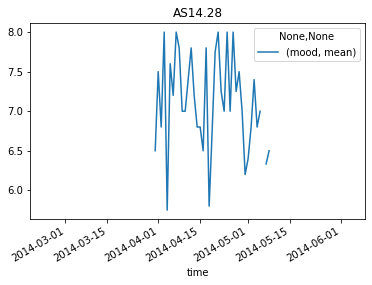

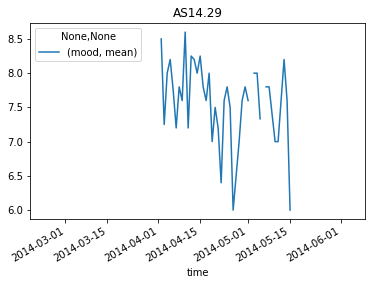

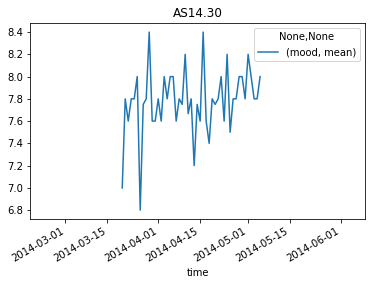

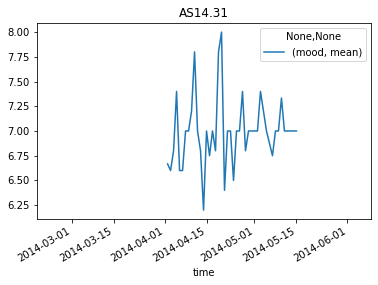

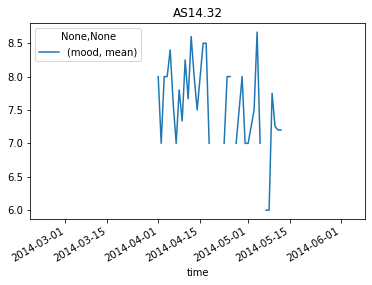

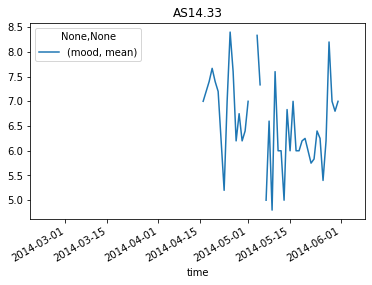

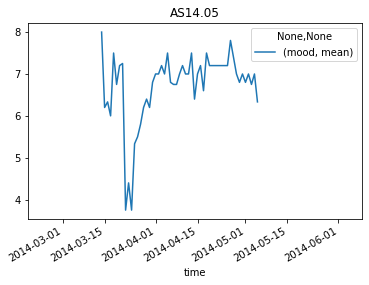

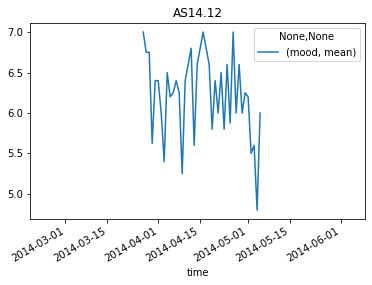

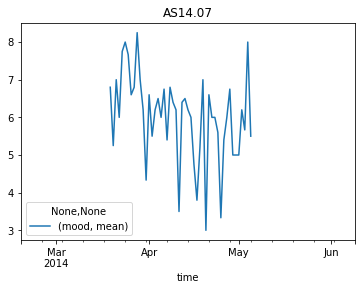

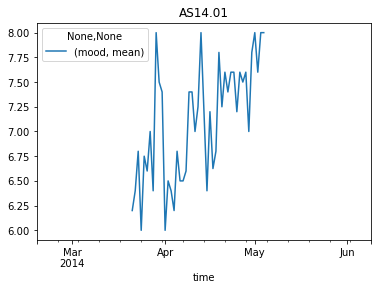

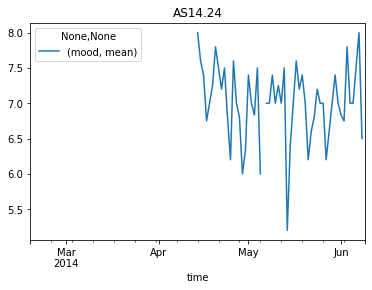

In [15]:
for idx in df_daily['id'].unique():
    df_id = df_daily.loc[df_daily['id']==idx]
    df_id.plot(x='time', y=('mood', 'mean'), title=idx, xlim=(df_wide['time'].min(), df_wide['time'].max()))

In [16]:
 ## Fill Nan's for zero columns
cols_count = ['call', 'sms']
cols_time = list(filter(lambda col: col.startswith('appCat.'), variables.tolist())) + ['screen']

df_filled = df_daily[cols_count+cols_time].fillna(0) # Workaround due to MultiIndex on columns fucking up
df_daily.fillna(df_filled, inplace=True)

display(df_daily)

time       id mood                                   \
                          min  max median mean       std count   
0    2014-02-17  AS14.02  NaN  NaN    NaN  NaN       NaN     0   
1    2014-02-17  AS14.03  NaN  NaN    NaN  NaN       NaN     0   
2    2014-02-17  AS14.06  NaN  NaN    NaN  NaN       NaN     0   
3    2014-02-17  AS14.08  NaN  NaN    NaN  NaN       NaN     0   
4    2014-02-17  AS14.09  NaN  NaN    NaN  NaN       NaN     0   
...         ...      ...  ...  ...    ...  ...       ...   ...   
1942 2014-06-05  AS14.24  7.0  7.0    7.0  7.0  0.000000     5   
1943 2014-06-06  AS14.24  7.0  8.0    7.5  7.5  0.577350     4   
1944 2014-06-07  AS14.24  8.0  8.0    8.0  8.0       NaN     1   
1945 2014-06-08  AS14.24  6.0  7.0    6.5  6.5  0.707107     2   
1946 2014-06-09  AS14.24  NaN  NaN    NaN  NaN       NaN     0   

     circumplex.arousal       ... appCat.utilities               \
                    min  max  ...              std count    sum   
0                   NaN  NaN  ...              0.0     0  0.000   
1                   NaN  NaN  ...              0.0     0  0.000   
2                   NaN  NaN  ...              0.0     0  0.000   
3                   NaN  NaN  ...              0.0     0  0.000   
4                   NaN  NaN  ...              0.0     0  0.000   
...                 ...  ...  ...              ...   ...    ...   
1942               -1.0  1.0  ...              0.0     0  0.000   
1943               -2.0  2.0  ...              0.0     1  2.072   
1944               -1.0 -1.0  ...              0.0     0  0.000   
1945               -2.0 -1.0  ...              0.0     0  0.000   
1946                NaN  NaN  ...              0.0     0  0.000   

     appCat.weather                                   
                min  max median mean  std count  sum  
0               0.0  0.0    0.0  0.0  0.0     0  0.0  
1               0.0  0.0    0.0  0.0  0.0     0  0.0  
2               0.0  0.0    0.0  0.0  0.0     0  0.0  
3               0.0  0.0    0.0  0.0  0.0     0  0.0  
4               0.0  0.0    0.0  0.0  0.0     0  0.0  
...             ...  ...    ...  ...  ...   ...  ...  
1942            0.0  0.0    0.0  0.0  0.0     0  0.0  
1943            0.0  0.0    0.0  0.0  0.0     0  0.0  
1944            0.0  0.0    0.0  0.0  0.0     0  0.0  
1945            0.0  0.0    0.0  0.0  0.0     0  0.0  
1946            0.0  0.0    0.0  0.0  0.0     0  0.0  

[1947 rows x 125 columns]

In [17]:
## Forward Fill Nan's for score columns
cols_score = ['mood', 'circumplex.arousal', 'circumplex.valence', 'affect', 'activity']

df_temp = df_daily.set_index(['id', 'time']).sort_index()
df_filled = df_temp[cols_score].groupby('id').ffill(limit=3)  # max allowed gap of .. days

df_daily = df_temp.fillna(df_filled).reset_index()

display(df_daily)


id       time mood                                     \
                          min   max median  mean       std count   
0     AS14.01 2014-03-21  6.0   7.0    6.0  6.20  0.447214     5   
1     AS14.01 2014-03-22  5.0   7.0    7.0  6.40  0.894427     5   
2     AS14.01 2014-03-23  6.0   8.0    7.0  6.80  0.836660     5   
3     AS14.01 2014-03-24  5.0   7.0    6.0  6.00  0.707107     5   
4     AS14.01 2014-03-25  6.0   8.0    6.5  6.75  0.957427     4   
...       ...        ...  ...   ...    ...   ...       ...   ...   
1942  AS14.33 2014-05-27  5.0   7.0    6.0  6.20  0.836660     5   
1943  AS14.33 2014-05-28  6.0  10.0    9.0  8.20  1.643168     5   
1944  AS14.33 2014-05-29  7.0   7.0    7.0  7.00  0.000000     3   
1945  AS14.33 2014-05-30  6.0   8.0    6.0  6.80  1.095445     5   
1946  AS14.33 2014-05-31  7.0   7.0    7.0  7.00  1.095445     1   

     circumplex.arousal       ... appCat.utilities                 \
                    min  max  ...              std count      sum   
0                  -1.0  1.0  ...        52.370984    26  598.754   
1                  -1.0  1.0  ...        22.125264     3  117.621   
2                  -1.0  1.0  ...         0.000000     1   30.086   
3                  -1.0  2.0  ...       112.149964     2  178.732   
4                  -1.0  1.0  ...        12.668620    10  222.893   
...                 ...  ...  ...              ...   ...      ...   
1942               -2.0  1.0  ...        19.198292     3   56.173   
1943               -2.0  2.0  ...         2.271551     6   30.666   
1944               -2.0 -1.0  ...         0.581949     2    3.199   
1945               -2.0  1.0  ...        19.301321    15  232.825   
1946               -2.0 -2.0  ...         0.000000     0    0.000   

     appCat.weather                                             
                min     max  median    mean  std count     sum  
0             0.000   0.000   0.000   0.000  0.0     0   0.000  
1             0.000   0.000   0.000   0.000  0.0     0   0.000  
2            30.386  30.386  30.386  30.386  0.0     1  30.386  
3             0.000   0.000   0.000   0.000  0.0     0   0.000  
4             0.000   0.000   0.000   0.000  0.0     0   0.000  
...             ...     ...     ...     ...  ...   ...     ...  
1942          0.000   0.000   0.000   0.000  0.0     0   0.000  
1943          0.000   0.000   0.000   0.000  0.0     0   0.000  
1944          0.000   0.000   0.000   0.000  0.0     0   0.000  
1945          0.000   0.000   0.000   0.000  0.0     0   0.000  
1946          0.000   0.000   0.000   0.000  0.0     0   0.000  

[1947 rows x 125 columns]

In [18]:
## Day of Week dummy variables
df_daily[['mon', 'thue', 'wed', 'thu', 'fri', 'sat', 'sun']] = pd.get_dummies(df_daily['time'].dt.dayofweek)

display(df_daily.iloc[:, -7:])


,mon,thue,wed,thu,fri,sat,sun
,,,,,,,
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1942,0,1,0,0,0,0,0
1943,0,0,1,0,0,0,0
1944,0,0,0,1,0,0,0


In [19]:
## Tabular aggregation
df_temp = df_daily.copy().set_index(['id', 'time']).sort_index()

lookback_days = 5
df_tab = df_temp[cols_score+cols_count+cols_time].rolling(window=lookback_days).mean()
df_tab = pd.concat([df_tab, df_temp[['mon', 'thue', 'wed', 'thu', 'fri', 'sat', 'sun']]], axis=1)   # DayOfWeek excluded from rolling mean
df_tab['target'] = df_temp[('mood', 'mean')].shift(periods=-1) # next day mean mood

display(df_tab)

mood                                        \
                    min  max median      mean       std count   
id      time                                                    
AS14.01 2014-03-21  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-22  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-23  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-24  NaN  NaN    NaN       NaN       NaN   NaN   
        2014-03-25  5.6  7.4    6.5  6.430000  0.768567   4.8   
...                 ...  ...    ...       ...       ...   ...   
AS14.33 2014-05-27  4.2  7.4    6.2  6.016667  1.259839   5.0   
        2014-05-28  4.6  7.8    6.9  6.490000  1.294081   4.8   
        2014-05-29  5.2  7.6    6.9  6.610000  0.990766   4.4   
        2014-05-30  5.4  7.8    6.8  6.720000  1.018370   4.6   
        2014-05-31  6.2  7.8    7.0  7.040000  0.934144   3.8   

                   circumplex.arousal                        ... screen  \
                                  min  max median      mean  ...  count   
id      time                                                 ...          
AS14.01 2014-03-21                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-22                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-23                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-24                NaN  NaN    NaN       NaN  ...    NaN   
        2014-03-25               -1.0  1.2    0.6  0.460000  ...  134.0   
...                               ...  ...    ...       ...  ...    ...   
AS14.33 2014-05-27               -2.0  1.0   -0.8 -0.666667  ...   58.8   
        2014-05-28               -2.0  1.2   -0.4 -0.500000  ...   76.8   
        2014-05-29               -2.0  0.8   -0.4 -0.616667  ...   69.0   
        2014-05-30               -2.0  0.8   -0.4 -0.626667  ...   73.0   
        2014-05-31               -2.0  0.2   -0.8 -0.946667  ...   60.4   

                                 mon thue wed thu fri sat sun target  
                             sum                                      
id      time                                                          
AS14.01 2014-03-21           NaN   0    0   0   0   1   0   0   6.40  
        2014-03-22           NaN   0    0   0   0   0   1   0   6.80  
        2014-03-23           NaN   0    0   0   0   0   0   1   6.00  
        2014-03-24           NaN   1    0   0   0   0   0   0   6.75  
        2014-03-25  13483.521200   0    1   0   0   0   0   0   6.60  
...                          ...  ..  ...  ..  ..  ..  ..  ..    ...  
AS14.33 2014-05-27   9614.496000   0    1   0   0   0   0   0   8.20  
        2014-05-28  11110.705799   0    0   1   0   0   0   0   7.00  
        2014-05-29   9649.552200   0    0   0   1   0   0   0   6.80  
        2014-05-30  10080.584599   0    0   0   0   1   0   0   7.00  
        2014-05-31   6295.547000   0    0   0   0   0   1   0    NaN  

[1947 rows x 131 columns]

In [20]:
## TODO: drop nan rows?


